In [1]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
#ivy: 
#1. understand the columns
columns_list = list(df.columns)
print(type(columns_list), columns_list )

target_list = ['TARGET CLASS']
print(target_list)  

feature_list = columns_list.copy()
feature_list.remove('TARGET CLASS')
print(feature_list)

#2. df_target: target variable
df_target = df[target_list] 
print(df_target.head())

#3. df_feature: features
df_feature = df[feature_list] 
print(df_feature.head())

<class 'list'> ['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ', 'TARGET CLASS']
['TARGET CLASS']
['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']
   TARGET CLASS
0             1
1             0
2             0
3             1
4             1
        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  
0  0.643798  0.879422  1.231409  
1  1.013546  0.621552  1.492702  
2  1.154483  0.957877  1.285597  
3  1.380003  1.522692  1.153093  
4  0.646691  1.463812  1.419167  


In [4]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_feature)
scaled_features = scaler.transform(df_feature)
df_scaled_features = pd.DataFrame(scaled_features, columns = feature_list) 
df_scaled_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [5]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled_features, df_target, 
                                                    test_size = 0.3, 
                                                    random_state = 101)

In [30]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

#Y_test 轉成array 會變成2d，需要用ravel轉成1d
print(np.array(Y_test).ndim)
error = np.mean(pred != np.array(Y_test).ravel())

2


C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))

[[151   8]
 [ 15 126]]


In [19]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [42]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
error_rate = []

for k in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error = round(np.mean(pred != np.array(Y_test).ravel()),4)
    error_rate.append(error)

print(error_rate)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[0.0767, 0.09, 0.05, 0.07, 0.0567, 0.05, 0.0667, 0.06, 0.05, 0.0567, 0.0533, 0.0467, 0.05, 0.0567, 0.0567, 0.05, 0.05, 0.0467, 0.05, 0.0533, 0.05, 0.05, 0.0633, 0.0567, 0.0567, 0.05, 0.05, 0.0467, 0.06, 0.05, 0.0567, 0.0467, 0.0533, 0.0433, 0.0467, 0.0433, 0.0467, 0.0433, 0.05, 0.04, 0.0433, 0.0433, 0.0433, 0.0433, 0.0533, 0.05, 0.06, 0.0567, 0.0533, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0533]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Error Rate')

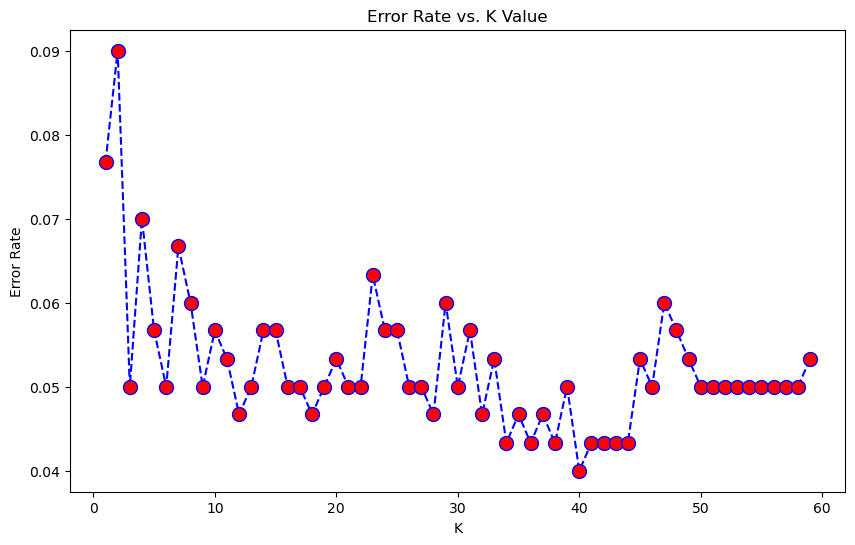

In [43]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
#跟一開始k=1做比較
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

#Y_test 轉成array 會變成2d，需要用ravel轉成1d
print(np.array(Y_test).ndim)
error = np.mean(pred != np.array(Y_test).ravel())

print('WITH k=1')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

2
WITH k=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
#選擇錯誤率最低的K=40來看precision、recall、f1-score、support表現
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

#Y_test 轉成array 會變成2d，需要用ravel轉成1d
print(np.array(Y_test).ndim)
error = np.mean(pred != np.array(Y_test).ravel())

print('WITH k=40')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

2
WITH k=40


[[154   5]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



C:\Users\user\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
